In [2]:
import geopandas
import seaborn
import pandas
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon



In [3]:
!pip install contextily
!pip install rioxarray
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 28.7 MB/s

In [5]:
from pysal.lib import cg as geometry
import rioxarray
import contextily


## Spatial weights

In [6]:
from pysal.lib import weights

### Contiguity weights

Criando poligonos

In [51]:
# Get points in a grid
n = 20
l = numpy.arange(n)
xs, ys = numpy.meshgrid(l, l)
# Set up store
polys = []
# Generate polygons
for x, y in zip(xs.flatten(), ys.flatten()):
    poly = Polygon([(x, y), (x + 1, y), (x + 1, y + 1), (x, y + 1)])
    polys.append(poly)
# Convert to GeoSeries
polys = geopandas.GeoSeries(polys)
gdf = geopandas.GeoDataFrame(
    {
        "geometry": polys,
        #"id": [str(i).zfill(2) +str(j).zfill(2) for i in range(n) for j in range(n)],
        "id":[str(j).zfill(2) +str(i).zfill(2) for i in range(n-1,-1,-1) for j in range(n)],
        "past_value": 0,
        "present_value": 0,
    }
)
gdf

,geometry,id,past_value,present_value
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",0019,0,0
1,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",0119,0,0
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",0219,0,0
3,"POLYGON ((3.00000 0.00000, 4.00000 0.00000, 4....",0319,0,0
4,"POLYGON ((4.00000 0.00000, 5.00000 0.00000, 5....",0419,0,0
...,...,...,...,...
395,"POLYGON ((15.00000 19.00000, 16.00000 19.00000...",1500,0,0
396,"POLYGON ((16.00000 19.00000, 17.00000 19.00000...",1600,0,0
397,"POLYGON ((17.00000 19.00000, 18.00000 19.00000...",1700,0,0
398,"POLYGON ((18.00000 19.00000, 19.00000 19.00000...",1800,0,0


In [8]:
[str(j).zfill(2) +str(i).zfill(2) for i in range(3,0,-1) for j in range(3)]

['0003', '0103', '0203', '0002', '0102', '0202', '0001', '0101', '0201']

In [39]:
polys

0      POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1      POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....
2      POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3      POLYGON ((3.00000 0.00000, 4.00000 0.00000, 4....
4      POLYGON ((4.00000 0.00000, 5.00000 0.00000, 5....
                             ...                        
395    POLYGON ((15.00000 19.00000, 16.00000 19.00000...
396    POLYGON ((16.00000 19.00000, 17.00000 19.00000...
397    POLYGON ((17.00000 19.00000, 18.00000 19.00000...
398    POLYGON ((18.00000 19.00000, 19.00000 19.00000...
399    POLYGON ((19.00000 19.00000, 20.00000 19.00000...
Length: 400, dtype: geometry

In [52]:
gdf.set_index(['id'], inplace=True)
gdf

,geometry,past_value,present_value
id,,,
0019,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",0,0
0119,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",0,0
0219,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",0,0
0319,"POLYGON ((3.00000 0.00000, 4.00000 0.00000, 4....",0,0
0419,"POLYGON ((4.00000 0.00000, 5.00000 0.00000, 5....",0,0
...,...,...,...
1500,"POLYGON ((15.00000 19.00000, 16.00000 19.00000...",0,0
1600,"POLYGON ((16.00000 19.00000, 17.00000 19.00000...",0,0
1700,"POLYGON ((17.00000 19.00000, 18.00000 19.00000...",0,0


In [47]:
def insert_glider(gdf, start_x, start_y):
    glider_pattern = [
        [0, 1, 0],
        [0, 0, 1],
        [1, 1, 1]
    ]

    for i in range(3):
        for j in range(3):
            idx = str(start_x+j).zfill(2)+str(start_y+i).zfill(2)
            gdf.loc[idx, 'past_value'] = glider_pattern[i][j]


In [54]:
gdf['past_value'] = 0
insert_glider(gdf,5,5)


<Axes: >

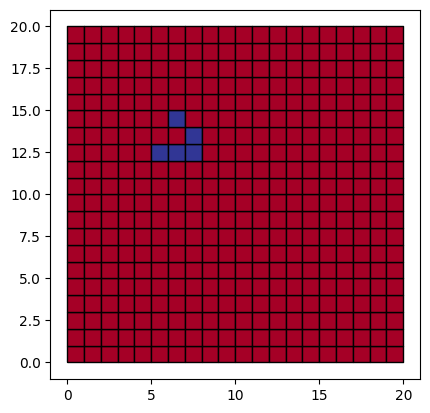

In [49]:
gdf.plot(facecolor="w", edgecolor="k", column='past_value', cmap='RdYlBu')

In [24]:
gdf

,geometry,past_value,present_value,value
id,,,,
0019,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",0,0.0,NaN
0119,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",0,0.0,NaN
0219,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",0,0.0,NaN
0319,"POLYGON ((3.00000 0.00000, 4.00000 0.00000, 4....",0,0.0,NaN
0419,"POLYGON ((4.00000 0.00000, 5.00000 0.00000, 5....",0,0.0,NaN
...,...,...,...,...
1700,"POLYGON ((17.00000 19.00000, 18.00000 19.00000...",0,0.0,NaN
1800,"POLYGON ((18.00000 19.00000, 19.00000 19.00000...",0,0.0,NaN
1900,"POLYGON ((19.00000 19.00000, 20.00000 19.00000...",0,0.0,NaN


In [29]:
gdf['geometry']


id
0019    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
0119    POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....
0219    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
0319    POLYGON ((3.00000 0.00000, 4.00000 0.00000, 4....
0419    POLYGON ((4.00000 0.00000, 5.00000 0.00000, 5....
                              ...                        
1700    POLYGON ((17.00000 19.00000, 18.00000 19.00000...
1800    POLYGON ((18.00000 19.00000, 19.00000 19.00000...
1900    POLYGON ((19.00000 19.00000, 20.00000 19.00000...
33                                                   None
0                                                    None
Name: geometry, Length: 402, dtype: geometry

In [58]:
wr = weights.contiguity.Queen.from_dataframe(gdf, use_index=True)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

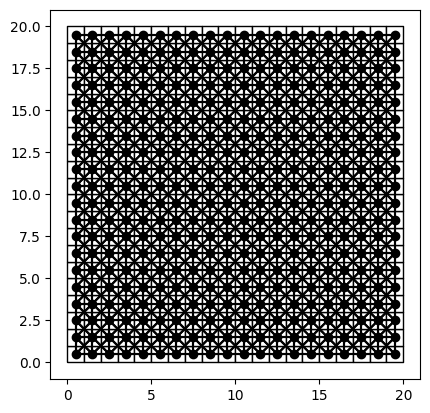

In [59]:
ax = gdf.plot(facecolor="w", edgecolor="k")
wr.plot(gdf, ax=ax)


Veja em https://pysal.org/notebooks/lib/libpysal/weights.html

In [60]:
wr.n

400

In [77]:
for i in range(n):
        for j in range(n):
          idx = str(i).zfill(2) + str(i).zfill(2)
          print (idx, wr.neighbors[idx])

0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0000 ['0101', '0100', '0001']
0101 ['0201', '0202', '0200', '0100', '0000', '0102', '0002', '0001']
0101 ['0201', '0202', '0200', '0100', '0000', '0102', '0002', '0001']
0101 ['0201', '0202', '0200', '0100', '0000', '0102', '0002', '0001']
0101 ['0201', '0202', '0200', '0100', '0000', '0102', '0002', '0001']
0101 ['0201', '0202', '0200', '0100', '0000', '0102', '0002', '0001']
0101 ['0201', '0202', '0200', '0100', '0000', '010

In [62]:
wr.histogram

[(3, 4), (4, 0), (5, 72), (6, 0), (7, 0), (8, 324)]

In [63]:
gdf.loc[['0605', '0706']].past_value.sum()

2

In [64]:
def count_lives(gdf, neighs):
  return gdf.loc[neighs].past_value.sum()

In [65]:
gdf.loc["0001"].past_value

0

In [66]:
def rule (idx):
  value = gdf.loc[idx].past_value
  count = count_lives(gdf, wr.neighbors[idx])
  if value == 1:
    if count < 2 or count > 3:
      return 0
    else:
      return 1
  else:
    if count == 3:
      return 1
    else:
      return 0


In [67]:
def start(gdf):
  gdf['past_value'] = 0
  insert_glider(gdf,5,5)

In [68]:
def syncronize(gdf):
  gdf["past_value"] = gdf["present_value"]

In [69]:
def run (gdf):
  gdf["present_value"] = gdf.index.map(rule)

In [70]:
def plota(gdf):
  gdf.plot(facecolor="w", edgecolor="k", column='past_value', cmap='RdYlBu')

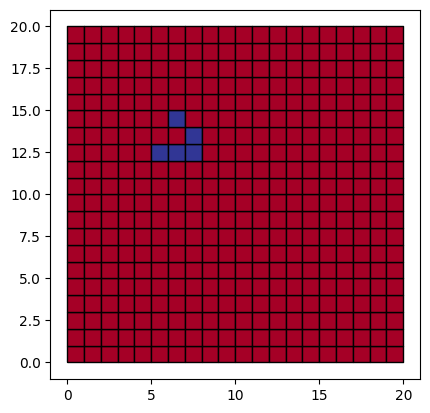

In [71]:
start(gdf)
plota(gdf)

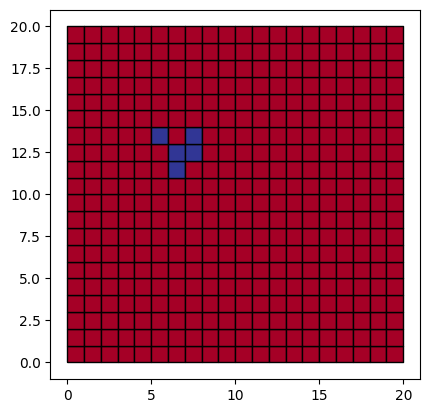

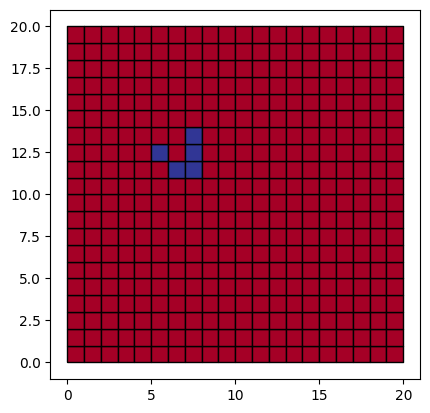

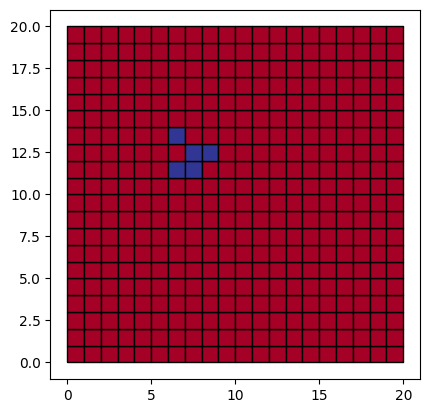

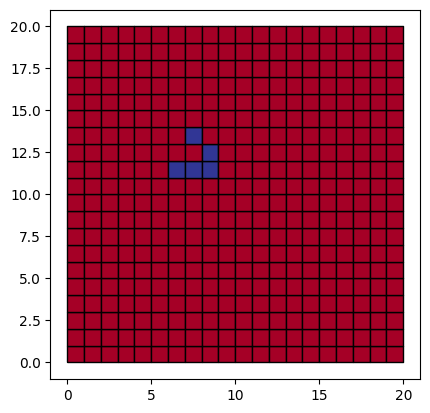

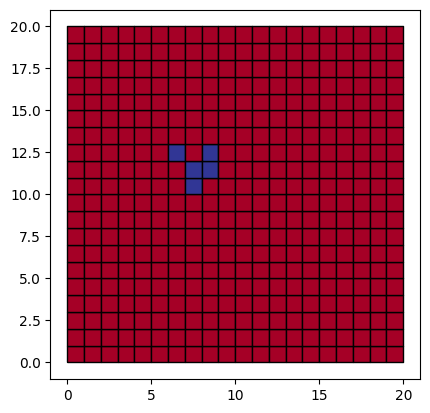

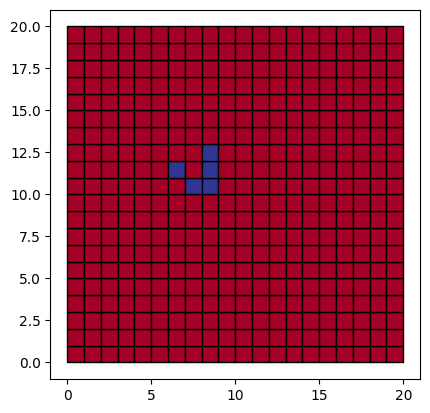

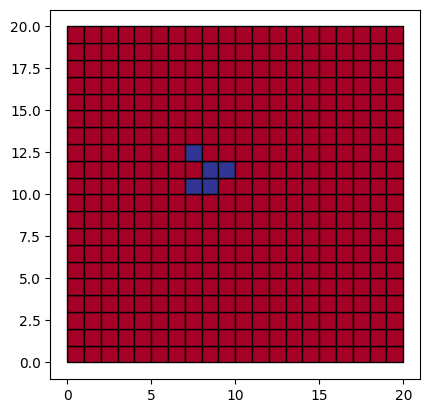

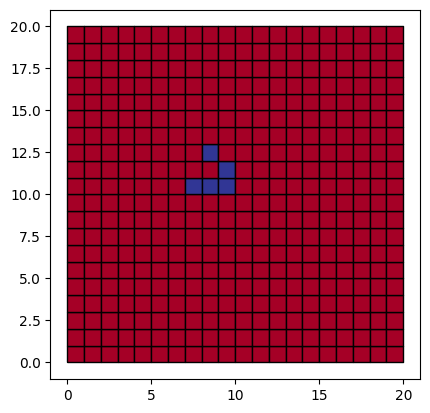

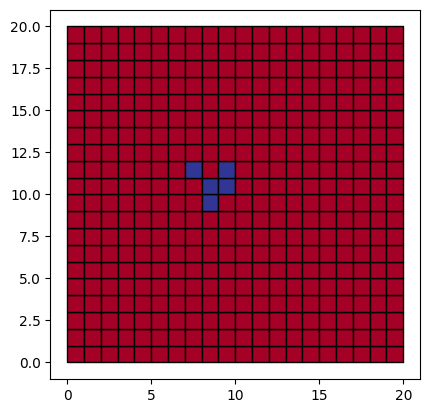

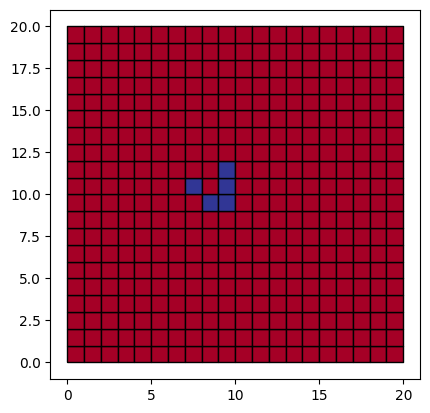

In [72]:
for i in range(10):
  run(gdf)
  syncronize(gdf)
  plota(gdf)